In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns
from torch.utils.data import Dataset, DataLoader 
from skorch import NeuralNetRegressor 

# Verificar si CUDA (GPU) está disponible
if torch.cuda.is_available():
    # Obtener el dispositivo actual
    device = torch.cuda.current_device()
    print(f"PyTorch está utilizando la GPU: {torch.cuda.get_device_name(device)}")
else:
    print("PyTorch está utilizando la CPU")

PyTorch está utilizando la GPU: NVIDIA GeForce GTX 1060


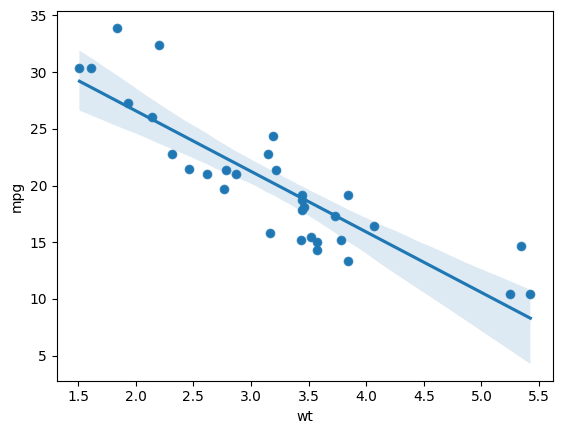

In [3]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

X_list = cars.wt.values
y_list = cars.mpg.values

X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)

X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

In [4]:
#%% Dataset and Dataloader
class LinearRegressionDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(dataset = LinearRegressionDataset(X_np, y_np), batch_size=2)

In [5]:
# creating a class for the model in order to use in a comfortable way 
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_size=input_dim, output_size=output_dim)

Esto es importante, LinearRegressionTorch es una subclase de nn.Module (como una herencia). 
la línea super(LinearRegressionTorch, self).__init__() se utiliza para asegurar que la instancia de la clase base se inicializa 
antes que la clase derivada. 
Es por esta relación base-derivada que en el siguiente code snippet se puede instanciar el método parameters que le pertenece a la clase base 

Epoch 0, Loss: 35.40817642211914
Epoch 100, Loss: 1.5676608085632324
Epoch 200, Loss: 1.411529302597046
Epoch 300, Loss: 1.4094297885894775
Epoch 400, Loss: 1.409427285194397
Epoch 500, Loss: 1.409427285194397
Epoch 600, Loss: 1.409427285194397
Epoch 700, Loss: 1.409427285194397
Epoch 800, Loss: 1.409427285194397
Epoch 900, Loss: 1.409427285194397
1000
1000


<Axes: >

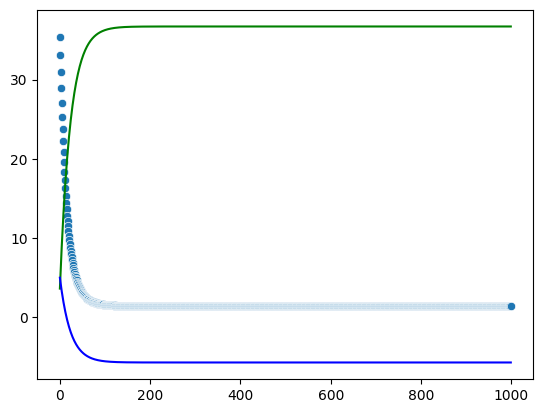

In [6]:
# hyperparameter definition
LR = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
losses, slope, bias = [], [], []
y_pred_total = []
NUM_EPOCHS = 1000
net.set_params(train_split=False, verbose = 0)
params = {
    'lr': [0.02, 0.05, 0.08], 
    'max epochs': [10, 200, 500]
}
gs = Grid
loss_fun = nn.MSELoss()

for epoch in range(NUM_EPOCHS):
    for j, (X, y) in enumerate(train_loader): # j is the index for batches iteration
        
        # set gradients to zero
        optimizer.zero_grad()

        # forward pass
        y_pred = model(X)
        y_pred_total.append(y_pred)
        # calculate loss
        loss = loss_fun(y_pred, y)
        #losses.append(loss.item())

        # backprop
        loss.backward()

        # update weights
        optimizer.step()

    # get parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            if name == 'linear.weight':
                slope.append(param.data.numpy()[0][0])
            if name == 'linear.bias':
                bias.append(param.data.numpy()[0])

    # store loss
    losses.append(float(loss.data))
    
    # print loss
    if (epoch % 100 == 0):
        # store loss
        print(f"Epoch {epoch}, Loss: {loss.data}")

print(len(range(NUM_EPOCHS)))
print(len(losses))

sns.scatterplot(x=range(len(losses)), y=losses)
sns.lineplot(x=range(NUM_EPOCHS), y=bias, color='green') # visualise the bias development
sns.lineplot(x=range(NUM_EPOCHS), y=slope, color='blue') # visualise the slope development

